In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("2NaiveBayes.csv")
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [9]:
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])

print("\n✅ Label Encoding Done!")


✅ Label Encoding Done!


In [10]:
X = df[['Age', 'Salary']]
y = df['Purchased']


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n✅ Data Scaled Successfully!")


✅ Data Scaled Successfully!


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("\n✅ Data Split Done! (70% Train, 30% Test)")
print(f"\nTraining Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")


✅ Data Split Done! (70% Train, 30% Test)

Training Data: (280, 2)
Testing Data: (120, 2)


In [13]:
model = GaussianNB()
model.fit(X_train, y_train)
print("\n✅ Naïve Bayes Model Trained Successfully!")


✅ Naïve Bayes Model Trained Successfully!


In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Model Accuracy: 92.50%

Confusion Matrix:
 [[72  1]
 [ 8 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        73
           1       0.97      0.83      0.90        47

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



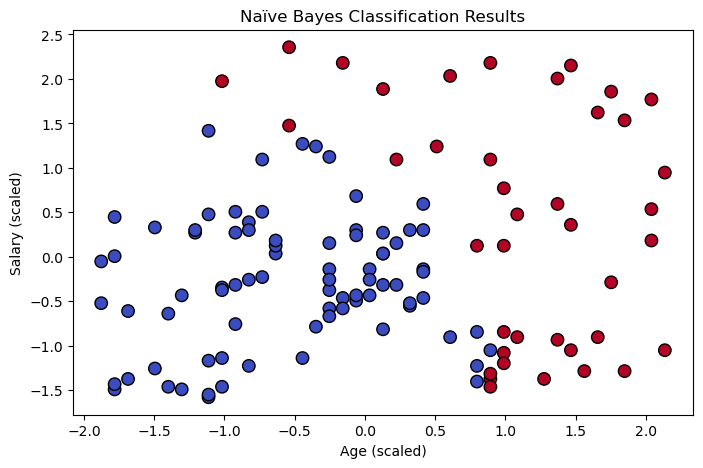

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=80)
plt.xlabel('Age (scaled)')
plt.ylabel('Salary (scaled)')
plt.title('Naïve Bayes Classification Results')
plt.show()

In [18]:
print("\n🔹 Test the model for custom inputs:")
age = int(input("Enter Age: "))
salary = int(input("Enter Salary: "))

# Prepare and scale input
sample = np.array([[age, salary]])
sample_scaled = scaler.transform(sample)

# Predict
prediction = model.predict(sample_scaled)

if prediction[0] == 1:
    print("\n🟢 Prediction: Purchased (Yes)")
else:
    print("\n🔴 Prediction: Not Purchased (No)")


🔹 Test the model for custom inputs:


Enter Age:  43
Enter Salary:  20999



🔴 Prediction: Not Purchased (No)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
